# HW 2

## Use AAPL.csv file and answer the following questions:

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [5]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100600,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095352,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088353,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090540,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093165,73449600


In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.830002,74602000
2021-09-30,143.660004,144.380005,141.279999,141.500000,141.500000,88934200
2021-10-01,141.899994,142.919998,139.110001,142.649994,142.649994,94639600
2021-10-04,141.759995,142.210007,138.270004,139.139999,139.139999,98322000
2021-10-05,139.490005,142.240005,139.360001,141.110001,141.110001,80861100


## Q1

### Q1.1, How many trading days this data set cover? (fill in the number in Camino)

In [10]:
data.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27',
               '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01',
               '2021-10-04', '2021-10-05'],
              dtype='datetime64[ns]', name='Date', length=10291, freq=None)

### Q1.2, What's the open price at 2020-08-28? (choose the closest price in Camino)

In [4]:
stock_o[stock_o.index=='2020-08-28']

Date
2020-08-28    126.012497
Name: Open, dtype: float64

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)? (choose the closest price in Camino)

In [26]:
data.loc['2018-01-01':'2018-03-31','Close'].mean()

43.04782798360656

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top. (choose the 1st date in Camino)

In [30]:
(stock_h - stock_l).nlargest()

Date
2020-09-04    12.809998
2020-09-02    10.979996
2021-01-25     8.550003
2020-09-03     8.339996
2021-02-23     8.320000
dtype: float64

### Q1.5, Plot the closing price vs date graph. (pick the command that you use to plot the graph in Camino, exclude the %pylab inline)

<AxesSubplot:xlabel='Date'>

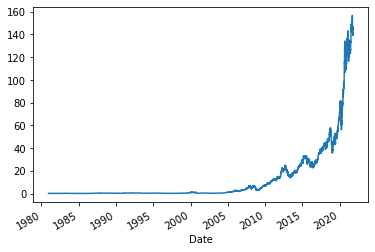

In [35]:
stock_c.plot()

### Q1.6, Plot the closing price vs date graph from the beginning of 2020 till most recent date. Do not use hard-coded date for the most recent date.  (fill in the last command that you use to plot the graph in Camino, exclude the %pylab inline) (instructor will grade this manually)

<AxesSubplot:xlabel='Date'>

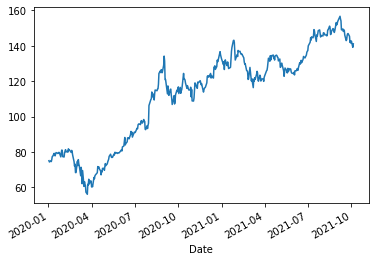

In [38]:

stock_c.loc['2020-01-01': ].plot()

## Q2

### Q2.1, Total how many trading days the stock price close at above 50 dollars ? (fill in the number in Camino)

In [40]:
stock_c.loc[stock_c>50].count()

659

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only. (choose the right date in Camino)

In [44]:
stock_c.loc[stock_c>50].index[0]

Timestamp('2018-08-01 00:00:00')

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares(100,000,000). (choose the right number in Camino)

In [47]:
data.loc[(data.Close>50) & (data.Volume>100000000)].count()

Open         390
High         390
Low          390
Close        390
Adj Close    390
Volume       390
dtype: int64

## Q3

### Q3.1, For dates with price close at more than 45 dollars, how many days are before 2018-05-10 ? Show the date and stock price.  (choose the number of days in Camino)

In [65]:
a = stock_c.loc[(data.Close>45) & (data.index<'2018-05-10')]

In [66]:
a.count()

5

### Q3.2, Show the top 5 trading volume(date and volume) for stock closing price over 100 dollars. (choose the largest volume date in Camino)

In [52]:
stock_v[stock_c>100].nlargest(5)

Date
2020-07-31    374336800
2020-08-24    345937600
2020-08-21    338054800
2020-09-04    332607200
2020-08-03    308151200
Name: Volume, dtype: int64

### Q3.3, Based on top 5 trading volume dates for stock closing price over 100 dollars, find the matching closing price and sort them based on price, highest one on top. (choose the first date in Camino)

In [59]:
k = data.loc[data.Close>100, ['Volume', 'Close']].nlargest(5, 'Volume')

In [60]:
k.Close.sort_values(ascending=False)

Date
2020-08-24    125.857498
2020-08-21    124.370003
2020-09-04    120.959999
2020-08-03    108.937500
2020-07-31    106.260002
Name: Close, dtype: float64

### Q3.4, Based on top 5 trading volume dates for stock closing price over 100 dollars, which date it gains the most money per share? Assuming buy at open and sell at close.(choose the date in Camino)

In [61]:
j = data.loc[data.Open>100,['Volume','Open']].nlargest(5,'Volume')


In [64]:
 (k.Close-j.Open).sort_values(ascending=False).index[0]

Timestamp('2020-08-21 00:00:00')